In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
import analyze
from analyze import SPE # takes some time since inits hax
from channel_dict import channel_dict
from tqdm import tqdm
import datetime
import pickle
from scipy.stats import norm
import shutil
from multihist import Hist1d

%matplotlib inline

In [2]:
import hax
#hax already initiated when analyze is imported

from spe_acceptance import data_dir_base, rawdata_dir


def data_exists(run_number):
    data_path=os.path.join(data_dir_base, 'run_%05d.h5' %int(run_number))
    return os.path.exists(data_path)

def all_data_exists(runlist):
    return all([data_exists(run) for run in runlist])

def file_to_list(runlist_file):
    return [int(run) for run in runlist_file.split('.')[0].split('_')[1:4]]

def get_run_time(run):
    return hax.runs.datasets[hax.runs.datasets.number == run].start.values[0]
    
def find_file(run):
    return [f for f in os.listdir('runlists') if any(int(run)==elem for elem in file_to_list(f))]

def get_list(run, runlists):
    for l in runlists:
        if run in l:
            return l


# Load data

In [36]:
runlists = [file_to_list(f) for f in sorted(os.listdir('runlists') )if f.endswith('.txt')]
resubmit_files = []
missing_runs = []

In [37]:
bot = []
low_acc_pmts = []
off_pmts = []

accs = []
errs = []

for l in runlists:
    if not all_data_exists(l):
        print('Need data for Runs %d, %d, %d' % (l[0], l[1], l[2]))
        continue
        
    else:
        C = analyze.SPECalibration(l)
        bot.append(C.bottom_run)
        off = C.off_channels
        off_pmts.append(off)
        accs.append(list(C.acc))
        errs.append(list(C.acc_errs))
        low_acc = np.where(C.acc < 0.5)[0]
        low_acc = [c for c in low_acc if c not in off]
        low_acc_pmts.append(low_acc)
        #print(low_acc_pmts)

/home/ershockley/analysis/SPE/analyze.py:63: RuntimeWarning: divide by zero encountered in true_divide
  acc =  1 - residual.cumsum(axis=1) / residual.sum(axis=1)[:, np.newaxis]
/home/ershockley/analysis/SPE/analyze.py:63: RuntimeWarning: invalid value encountered in true_divide
  acc =  1 - residual.cumsum(axis=1) / residual.sum(axis=1)[:, np.newaxis]


Need data for Runs 19757, 19758, 19759
Need data for Runs 20700, 20701, 20702


In [38]:
off = off_pmts[0]
low_acc = low_acc_pmts[0]

tmp_off=off
tmp_low = low_acc

print("LOW: ", low_acc)


for b, chlist, low in zip(bot, off_pmts, low_acc_pmts):
    diff1 = sorted(list(set(chlist) - set(tmp_off)))
    diff2 = sorted(list(set(tmp_off) - set(chlist)))
    
    diff3 = sorted(list(set(low) - set(tmp_low)))
    diff4 = sorted(list(set(tmp_low) - set(low)))
    
    print(b)
    if len(diff1) > 0:
        print("\tTURNED OFF: {l}".format(l=diff1))
        tmp_off = list(set(tmp_off) | set(diff1))
    
    if len(diff2) > 0:
        print("\tTURNED ON: {l}".format(l=diff2))
        tmp_off = list(set(tmp_off) - set(diff2))
        
    if len(diff3) > 0:
        print("\tNOW LOW: {l}".format(l=diff3))
        tmp_low = list(set(tmp_low) | set(diff3))
    
    if len(diff4) > 0:
        print("\tNOT LOW ANYMORE: {l}".format(l=diff4))
        tmp_low = list(set(tmp_low) - set(diff4))
        
    
    print("---------------------------------------\n\n")
    #print(list(diff1), list(diff2))

LOW:  []
16237
---------------------------------------


16343
	TURNED ON: [0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 131, 132, 133, 136, 138, 140, 141, 142, 143, 144, 145, 146, 147, 149, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 179, 180, 181, 182, 184, 185, 186, 187, 188, 189, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 207, 208, 209, 210, 211, 212, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 23

/home/ershockley/analysis/SPE/analyze.py:63: RuntimeWarning: divide by zero encountered in true_divide
  acc =  1 - residual.cumsum(axis=1) / residual.sum(axis=1)[:, np.newaxis]
/home/ershockley/analysis/SPE/analyze.py:63: RuntimeWarning: invalid value encountered in true_divide
  acc =  1 - residual.cumsum(axis=1) / residual.sum(axis=1)[:, np.newaxis]


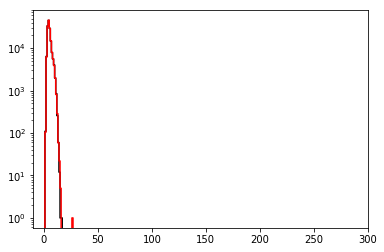

In [76]:
cal = analyze.SPECalibration(get_list(21355, runlists))

ch = 141
S = cal.bottom_cal

x = S.data['bin_centers']
y1 = S.data['noise_amplitude'][:, ch]
y2 = S.data['LED_amplitude'][:, ch]

plt.plot(x, y1, color='k', drawstyle='steps-mid')
plt.plot(x, y2, color='r', drawstyle='steps-mid')
plt.xlim(-10, 300)
plt.yscale('log')
plt.show()


# Build dataframe

In [67]:
skip_runs = [19277,  # LED was left on for noise run
             22493,  # bad noise conditions
             16237,  # LED off
             19277,  # LED left on for noise run
             19929,  # LED left on for noise run
             24112,  # LED left on for noise run
            ]

df = pd.DataFrame(np.array(accs).T, columns=bot)
df_errs = pd.DataFrame(np.array(errs).T, columns=bot)

df = df.drop(skip_runs, axis=1)

# Plot time dependence

In [69]:
X, Y = np.meshgrid(df.columns.values, df.index.values)

def get_acc(run, ch):
    return df.loc[ch, run]

Z = np.zeros_like(X, dtype=float)

for i, run in enumerate(df.columns.values):
    for j, ch in enumerate(df.index.values):
        Z[j, i] = get_acc(run, ch)
    


In [70]:
import matplotlib.pyplot as plt
import matplotlib as mpl

cm = mpl.cm.viridis_r
cmap = mpl.colors.ListedColormap(['blue', 'green', 'yellow', 'red', 'black'])

bounds = [0, 0.1, 0.5, 0.]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

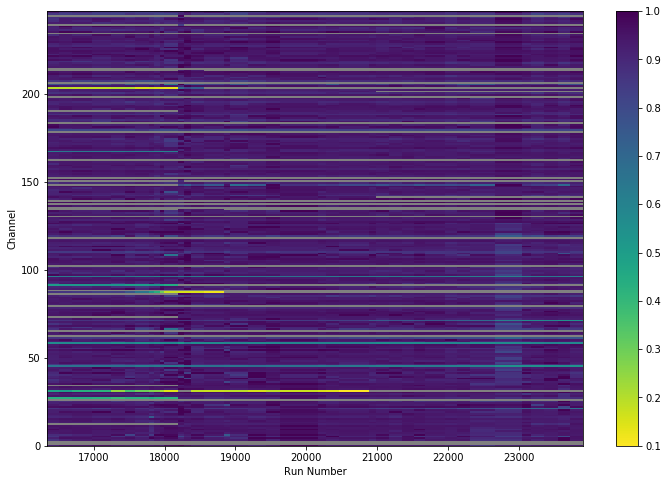

In [71]:
cmap = mpl.cm.viridis_r
cmap.set_under('grey')

plt.figure(figsize=(12,8))
c = plt.pcolor(X, Y, Z, vmin=0.1, cmap=cmap,  vmax=1)
plt.xlabel("Run Number")
plt.ylabel("Channel")
plt.colorbar(c)
plt.show()

In [72]:
from tqdm import tqdm
plotdir = 'time_plots_per_channel'
os.makedirs(plotdir, exist_ok=True)
for ch in tqdm(df.index):
    a = df.loc[ch].values
    
    f = plt.figure()
    plt.plot(df.columns, a, linestyle='None', marker='o', color='k')
    plt.xlabel("Run number")
    plt.ylabel("Acceptance")
    plt.title("Ch %d" % ch)
    plt.ylim(-0.05, 1.05)
    plt.grid()
    plt.axhline(0.5, color='red', linestyle='dashed')
    plt.savefig(os.path.join(plotdir, '%03d.png'%ch))
    plt.close()
    #plt.show()

100%|██████████| 248/248 [00:42<00:00,  5.80it/s]


In [79]:
df.loc[45]

16343    0.655633
16523    0.656547
16701    0.657982
16984    0.655034
17249    0.665459
17454    0.673087
17587    0.623268
17782    0.642049
17862    0.626882
17939    0.651179
17998    0.635572
18190    0.624034
18286    0.691918
18383    0.648912
18562    0.660487
18846    0.648139
18928    0.655811
19178    0.676653
19445    0.659705
19636    0.656162
20178    0.635470
20286    0.657611
20466    0.639219
20891    0.627300
20990    0.612526
21179    0.611960
21355    0.616381
21531    0.624607
21687    0.630291
21961    0.611168
22137    0.602971
22318    0.597442
22671    0.544690
23052    0.561177
23179    0.547434
23363    0.559775
23560    0.557692
23737    0.541100
23905    0.505614
Name: 45, dtype: float64

In [ ]:
check_channels = [2, 80, 87, 91, 205]

for ch in check_channels:
    a = df.loc[ch].values
    
    plt.plot(df.columns, a, linestyle='None', marker='o', color='k')
    plt.xlabel("Run number")
    plt.ylabel("Acceptance")
    plt.title("Ch %d" % ch)
    plt.ylim(-0.05, 1)
    plt.grid()
    plt.show()

In [ ]:
run = df.columns[np.where(df.loc[205].values < 0.7)][0]

l = get_list(run, runlists)
c = analyze.SPECalibration(l)

In [ ]:
print(l)

In [ ]:
ch = 205

cal = c.get_cal(ch)
x = cal.data['bin_centers']
noise = cal.data['noise_amplitude'][:, ch]
led = cal.data['LED_amplitude'][:, ch]

plt.plot(x, noise, color='k', drawstyle='steps-mid')
plt.plot(x, led, color='r', drawstyle='steps-mid')
plt.xlim(-10, 150)
plt.yscale('log')
plt.show()

plt.plot(x, noise, color='k', drawstyle='steps-mid')
plt.plot(x, led, color='r', drawstyle='steps-mid')
plt.xlim(-10, 20)
plt.yscale('log')
plt.show()

acc = cal.acceptance(val2corr2=8)[ch]

plt.plot(x, acc)
plt.xlim(-10, 20)
plt.show()